# CQF - Exam 1 - Optimal Portfolio Allocation

### Python imports

In [1]:
import pandas as pd
import numpy as np

An investment universe of the following risky assets with a dependency structure (correlation) is given:

In [2]:
assets = pd.DataFrame(
    data=[
        ['A', 0.02, 0.05],
        ['B', 0.07, 0.12],
        ['C', 0.15, 0.17],
        ['D', 0.20, 0.25],
        ], 
    columns=['asset', 'mu', 'sigma'])
assets

,asset,mu,sigma
0,A,0.02,0.05
1,B,0.07,0.12
2,C,0.15,0.17
3,D,0.20,0.25


In [3]:
R = np.matrix([
        [1.0, 0.3, 0.3, 0.3],
        [0.3, 1.0, 0.6, 0.6],
        [0.3, 0.6, 1.0, 0.6 ],
        [0.3, 0.6, 0.6, 1.0],
        ])
R

matrix([[1. , 0.3, 0.3, 0.3],
        [0.3, 1. , 0.6, 0.6],
        [0.3, 0.6, 1. , 0.6],
        [0.3, 0.6, 0.6, 1. ]])

## Question 1

Consider mininum variance portfolio with a target return $m$


$$\argmin_{w}\frac{1}{2}w^{'}\sum{w}$$

$s.t.$ 

$$w^{'}\mathbf{1} = 1$$

$$\mu_{\pi} = w^{'}\mu = m$$

- Formulate the Lagrangian and give its partial derivatives

<font color='blue'>We form the Lagrange function with tow Lagrange multipliers $\lambda$ and $\gamma$:

$$L(w,\lambda,\gamma) = \frac{1}{2} w^{'}\sum{w} + \lambda(m-w^{'}\mu) + \gamma(1-w^{'}\mathbf{1})$$

with partial derivatives:

$$\frac{\partial{L}}{\partial{w}} = \sum{w} - \lambda\mu - \gamma$$

$$\frac{\partial{L}}{\partial{\lambda}} = m - w^{'}\mu$$

$$\frac{\partial{L}}{\partial{\gamma}} = 1 - w^{'}\mathbf{1}$$

</font>

- Write down the anlytical solution for optimal allocations $w^{*}$ (derivation not required)

$$w^* = \frac{1}{(AC-B^2)} \sum^{-1}[(A\mu-B\mathbf{1})m + (C\mathbf{1}-B\mu)]$$

where:

$$
\begin{equation}
    \begin{cases}
        A=\mathbf{1}^{'}\sum^{-1}\mathbf{1}\\
        B=\mathbf{1}^{'}\sum^{-1}\mu\\
        C=\mu^{'}\sum^{-1}\mu
    \end{cases}
\end{equation}
$$

- Inverse optmization: generate above $700$ random allocation sets (vectors) 4x1, those will not be optimal allocations.

    Standardise each set to satisfy $w^{'}\mathbf{1} = 1$
    For each vector of allocations compute $\mu_{\pi} = w^{'}\mu$ and $\sigma_{\pi} = \sqrt{w^{'}\sum{w}}$

<AxesSubplot:xlabel='sigma'>

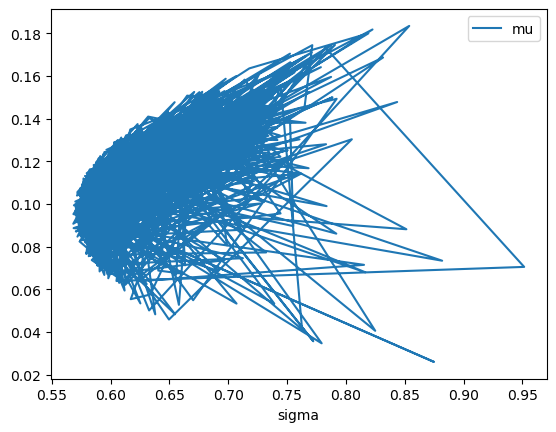

In [210]:
def gen_w(size):
    w = np.array([np.random.uniform() for i in range(0,size,1)])
    return w / w.sum()

n_assets = 4
cases = 1000
mu = np.array([0.02,0.07,0.15,0.2])
W = [gen_w(n_assets) for i in range(0,cases,1)]

data = [[np.dot(mu, w),np.dot(np.dot(w,R),w).sum()] for w in W]
df = pd.DataFrame(data=data,columns=['mu','sigma'])
df.plot(x='sigma', y='mu')

## Question 2